In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")

basic questions about dataset

In [3]:
# 1. size of data
df.shape

(1000, 8)

In [4]:
# 2. apperance of data
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
973,female,group D,some college,free/reduced,none,49,65,61
147,male,group C,associate's degree,free/reduced,none,73,68,66
661,male,group C,some high school,standard,none,73,66,63
675,female,group B,some college,standard,completed,50,64,66
988,female,group A,some high school,free/reduced,none,44,45,45


In [5]:
# 3. columns datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# 4. null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
# 5. mathematical apperance of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [8]:
# 6. duplicate rows
df.duplicated().sum()

np.int64(0)

In [9]:
# 7. correlation btw columns
df.corr(numeric_only=True)

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


EDA - univariate, bivariate and multivariate

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


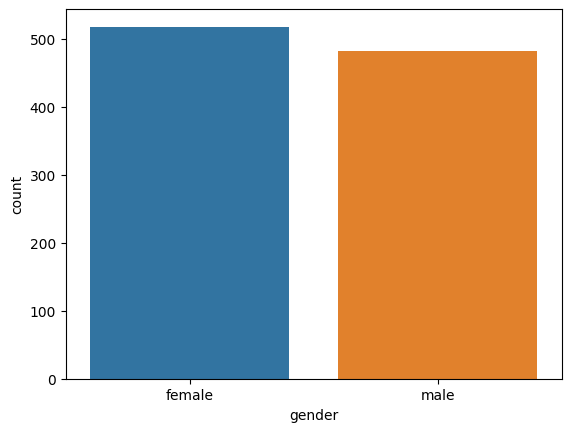

In [11]:
# gender univariate analysis - countplot and piechart
sns.countplot(x = df["gender"], hue = df["gender"]) 
plt.show()

gender
female    518
male      482
Name: count, dtype: int64


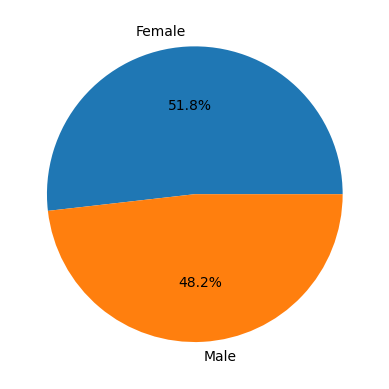

In [12]:
gender_counts = df["gender"].value_counts()
print(gender_counts)

plt.pie(gender_counts, labels = ["Female", "Male"], autopct = "%1.1f%%")
plt.show()

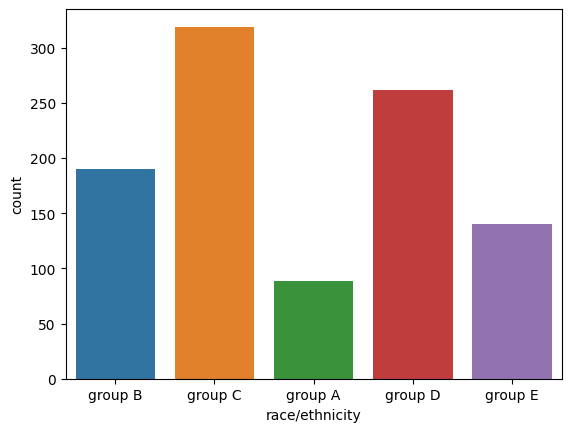

In [13]:
# race/ethnicity univariate analysis - countplot and piechart
sns.countplot(data = df, x = "race/ethnicity", hue = "race/ethnicity")
plt.show()

race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64


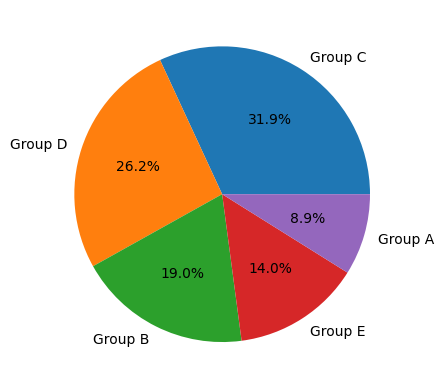

In [14]:
race_ethnicity_counts = df["race/ethnicity"].value_counts()
print(race_ethnicity_counts)

plt.pie(race_ethnicity_counts, labels = ["Group C", "Group D", "Group B", "Group E", "Group A"], autopct = "%1.1f%%")
plt.show()

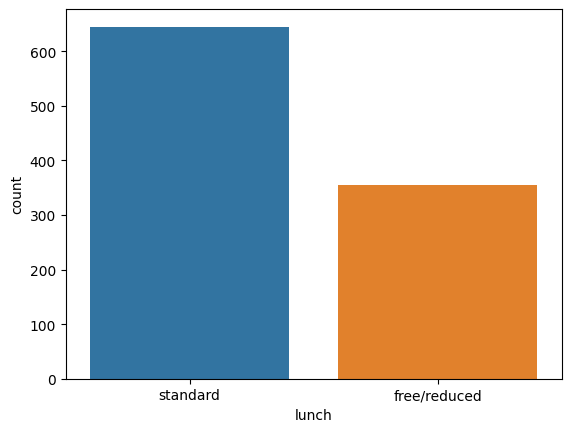

In [15]:
# lunch univariate analysis - countplot and piechart
sns.countplot(x = df["lunch"], hue = df["lunch"])
plt.show()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64


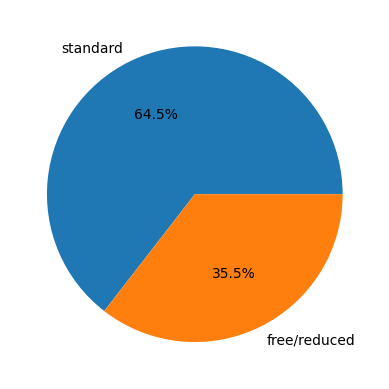

In [16]:
lunch_different_type_counts = df["lunch"].value_counts()
print(lunch_different_type_counts)

plt.pie(lunch_different_type_counts, labels = ["standard", "free/reduced"], autopct = "%1.1f%%")
plt.show()

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


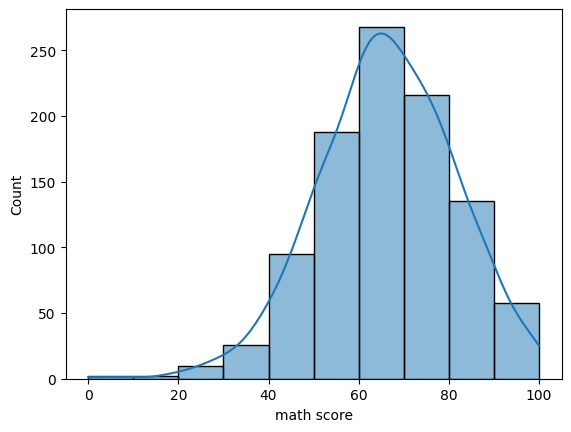

In [18]:
# math score univariate analysis - histogram, kde and boxplot
sns.histplot(x = df["math score"], bins = 10, kde = True)
plt.show()

In [19]:
df["math score"].skew()

np.float64(-0.27893514909431694)

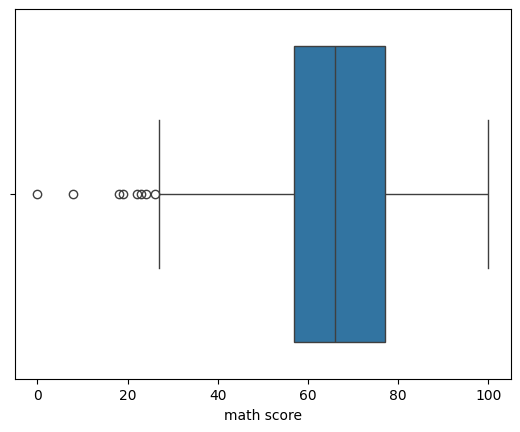

In [20]:
sns.boxplot(x = df["math score"])
plt.show()

In [21]:
# multivariate and bivariate analysis
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: xlabel='reading score', ylabel='math score'>

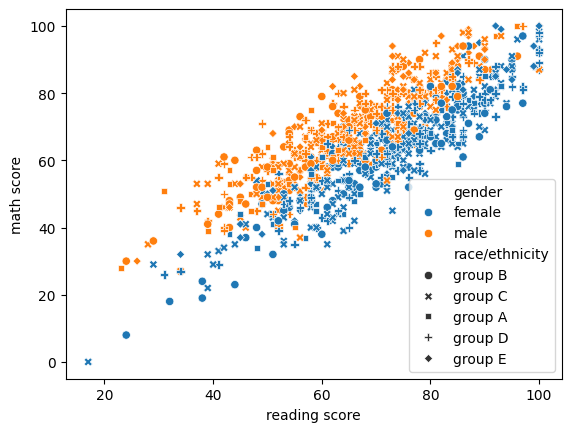

In [22]:
sns.scatterplot(x = df["reading score"], y = df["math score"], hue = df["gender"], style = df["race/ethnicity"])

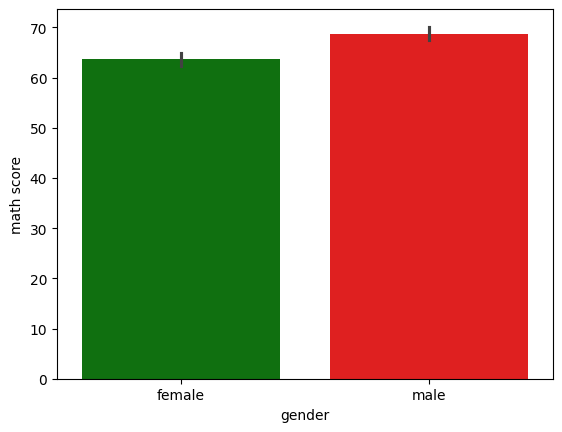

In [23]:
sns.barplot(x = df["gender"], y = df["math score"], hue = df["gender"], palette = ["green", "red"])
plt.show()

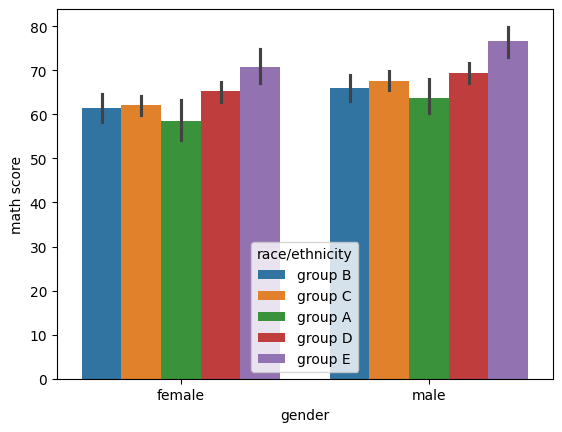

In [24]:
sns.barplot(x = df["gender"], y = df["math score"], hue = df["race/ethnicity"])
plt.show()

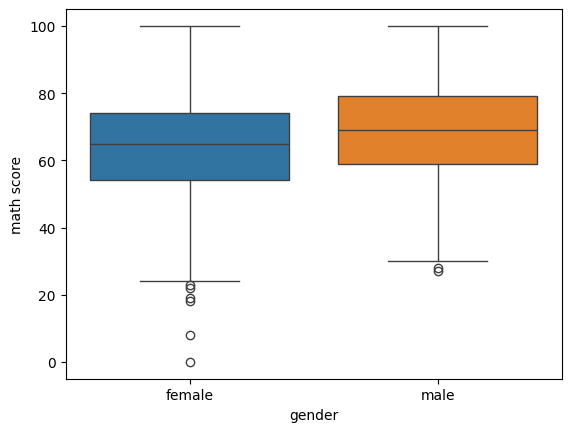

In [25]:
sns.boxplot(x = df["gender"], y = df["math score"], hue = df["gender"])
plt.show()

In [26]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


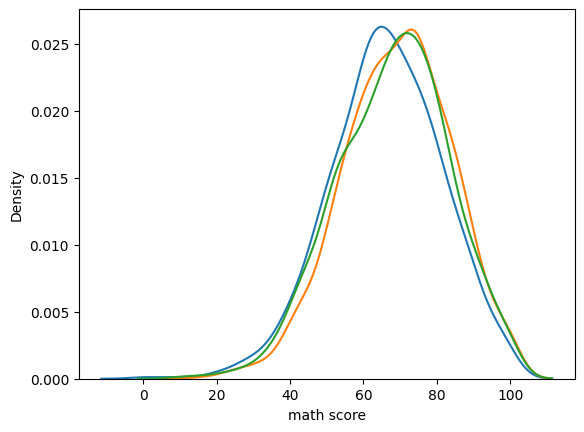

In [27]:
sns.kdeplot(df["math score"])
sns.kdeplot(df["reading score"])
sns.kdeplot(df["writing score"])
plt.show()

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [29]:
pd.crosstab(df["race/ethnicity"], df["gender"])

gender,female,male
race/ethnicity,,
group A,36,53
group B,104,86
group C,180,139
group D,129,133
group E,69,71


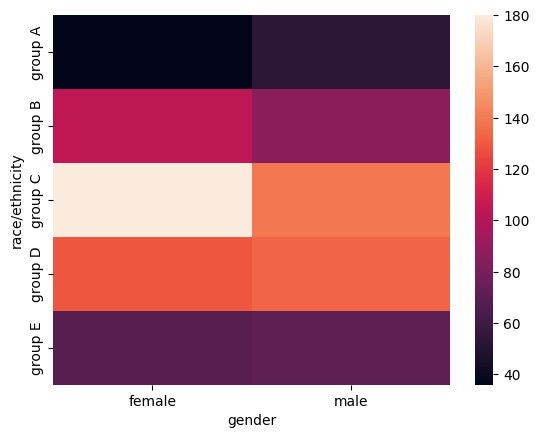

In [30]:
sns.heatmap(pd.crosstab(df["race/ethnicity"], df["gender"]))
plt.show()

In [31]:
pd.crosstab(df["race/ethnicity"], df["test preparation course"])

test preparation course,completed,none
race/ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


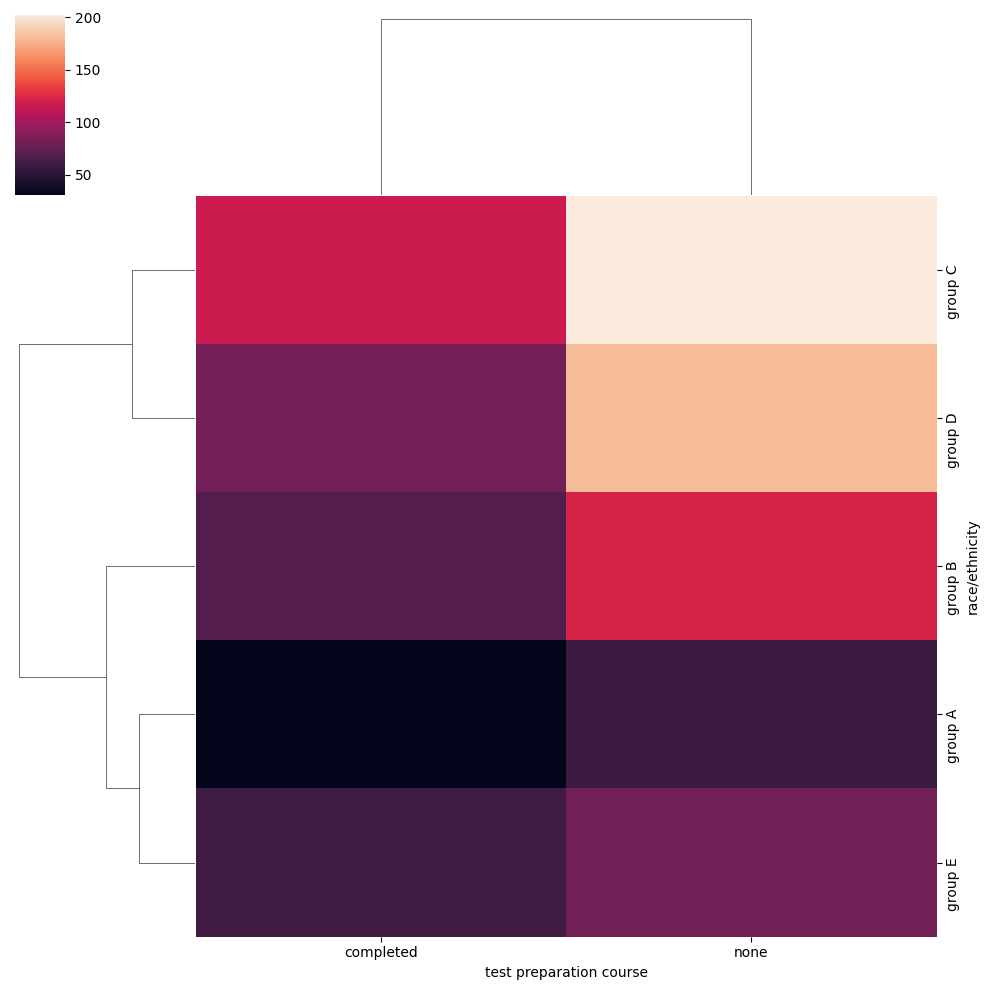

In [32]:
sns.clustermap(pd.crosstab(df["race/ethnicity"], df["test preparation course"]))
plt.show()

In [33]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


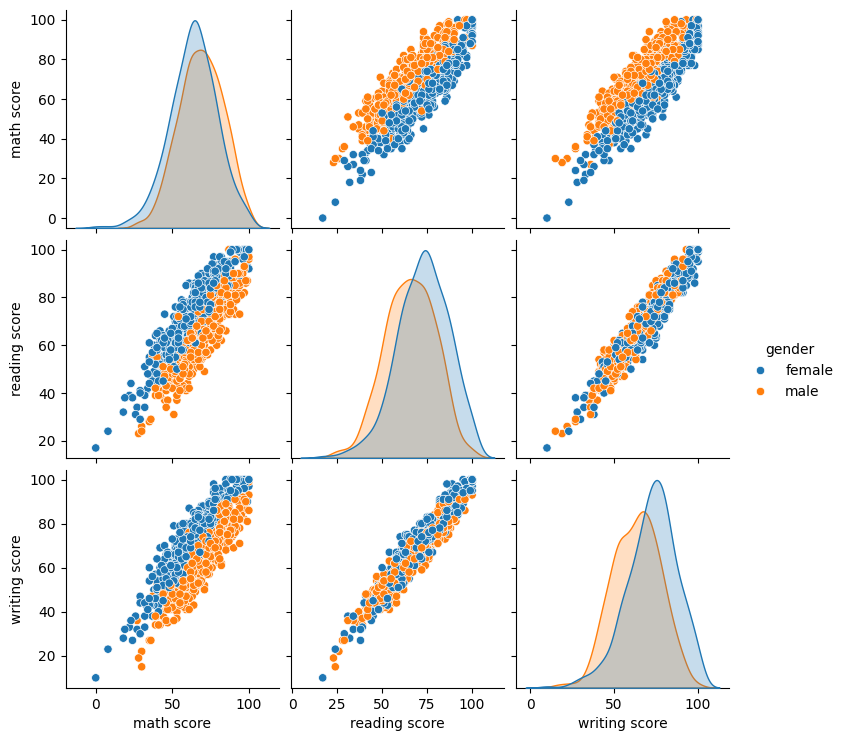

In [34]:
sns.pairplot(df, hue = "gender")
plt.show()

In [35]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


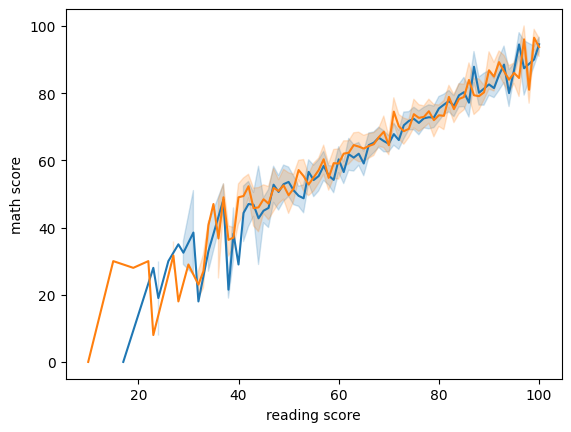

In [36]:
sns.lineplot(x = df["reading score"], y = df["math score"])
sns.lineplot(x = df["writing score"], y = df["math score"])
plt.show()

EDA - Pandas Profiling

In [37]:
from ydata_profiling import ProfileReport

In [38]:
profile = ProfileReport(df, title = "Student Performance Report")

In [39]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 553.37it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [40]:
# profile.to_file("Student_Performance_Report.html") # to save report file